# **Vorbereitung**

In [59]:
# Import der Python Pakete
import os
#import progressbar
#from google.colab import drive
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
# from __future__ import print_function, division
# import os
# import numpy as np
# import glob
# import torch
# from torchvision.utils import make_grid
# import torch.nn as nn # for definition of network
# import torch.optim as optim # for optimizazion of network
# import torch.nn.functional as F # for loss function
# from torch.utils.data import DataLoader # for loading data
# from torch.autograd import Variable
# from torchvision import datasets, transforms
# import torchvision.models as models
# from torch.utils.data import random_split
# import time
# import copy
# import shutil
# import random

In [47]:
## Verbindung mit Google Drive herstellen um die Bilder zu laden
#drive.mount('/content/gdrive', force_remount=True)  # use force_remount=True param after upload of new data

In [48]:
## Auswahl des Ordners, in welchem die Bilder liegen
#%cd gdrive/MyDrive/Pixel-Power/Bilder/

# **Ein paar Basics**

### Ein Bild besteht gewöhnlich aus 3 Ebenen:  <font color='red'>Rot</font> - <font color='green'>Grün</font> - <font color='blue'>Blau</font>

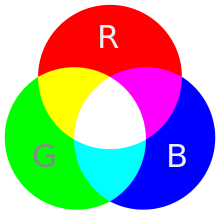



### Man kann Farben am Computer wiedergeben, indem man angibt, wie viel <font color='red'>rot</font>, <font color='green'>grün</font> und <font color='blue'>blau</font> sie enthalten sollen.


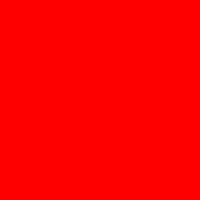

In [49]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Rot
farbe_rot = Image.new('RGB',(200,200),(255,0,0))
display(farbe_rot)

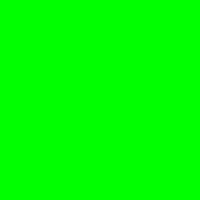

In [50]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Grün
farbe_grün = Image.new('RGB',(200,200),(0,255,0))
display(farbe_grün)

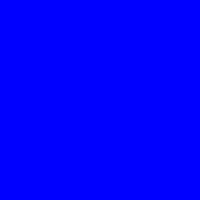

In [51]:
# Rot, Grün und Blau sind einfach zu erzeugen -> Blau
farbe_blau = Image.new('RGB',(200,200),(0,0,255))
display(farbe_blau)

Schwarz:


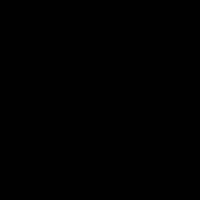

Weiß:


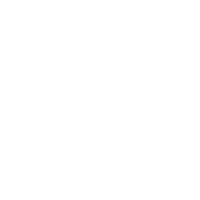

Lila:


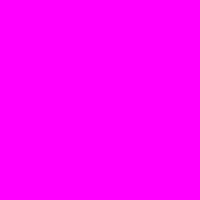

Grün:


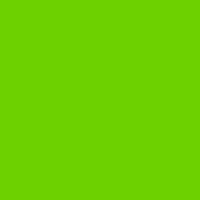

In [52]:
# Beispiel für andere Farben
print("Schwarz:")
farbe_schwarz = Image.new('RGB',(200,200),(0,0,0)) # keine Farben
display(farbe_schwarz)

print("Weiß:")
farbe_weiß = Image.new('RGB',(200,200),(255,255,255)) # alle Farben
display(farbe_weiß)

print("Lila:")
farbe_lila = Image.new('RGB',(200,200),(255,0,255)) # Rot und Blau
display(farbe_lila)

print("Grün:")
farbe_grün = Image.new('RGB',(200,200),(109,209,0)) # Grün mit Rot
display(farbe_grün)


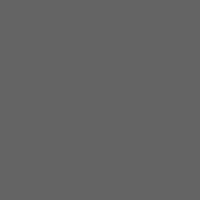

In [53]:
# Probiere aus, wie welche Farben gemischt werden können.
farb_experiment = Image.new('RGB',(200,200),(100,100,100)) 
display(farb_experiment)

# **Und jetzt geht's los**

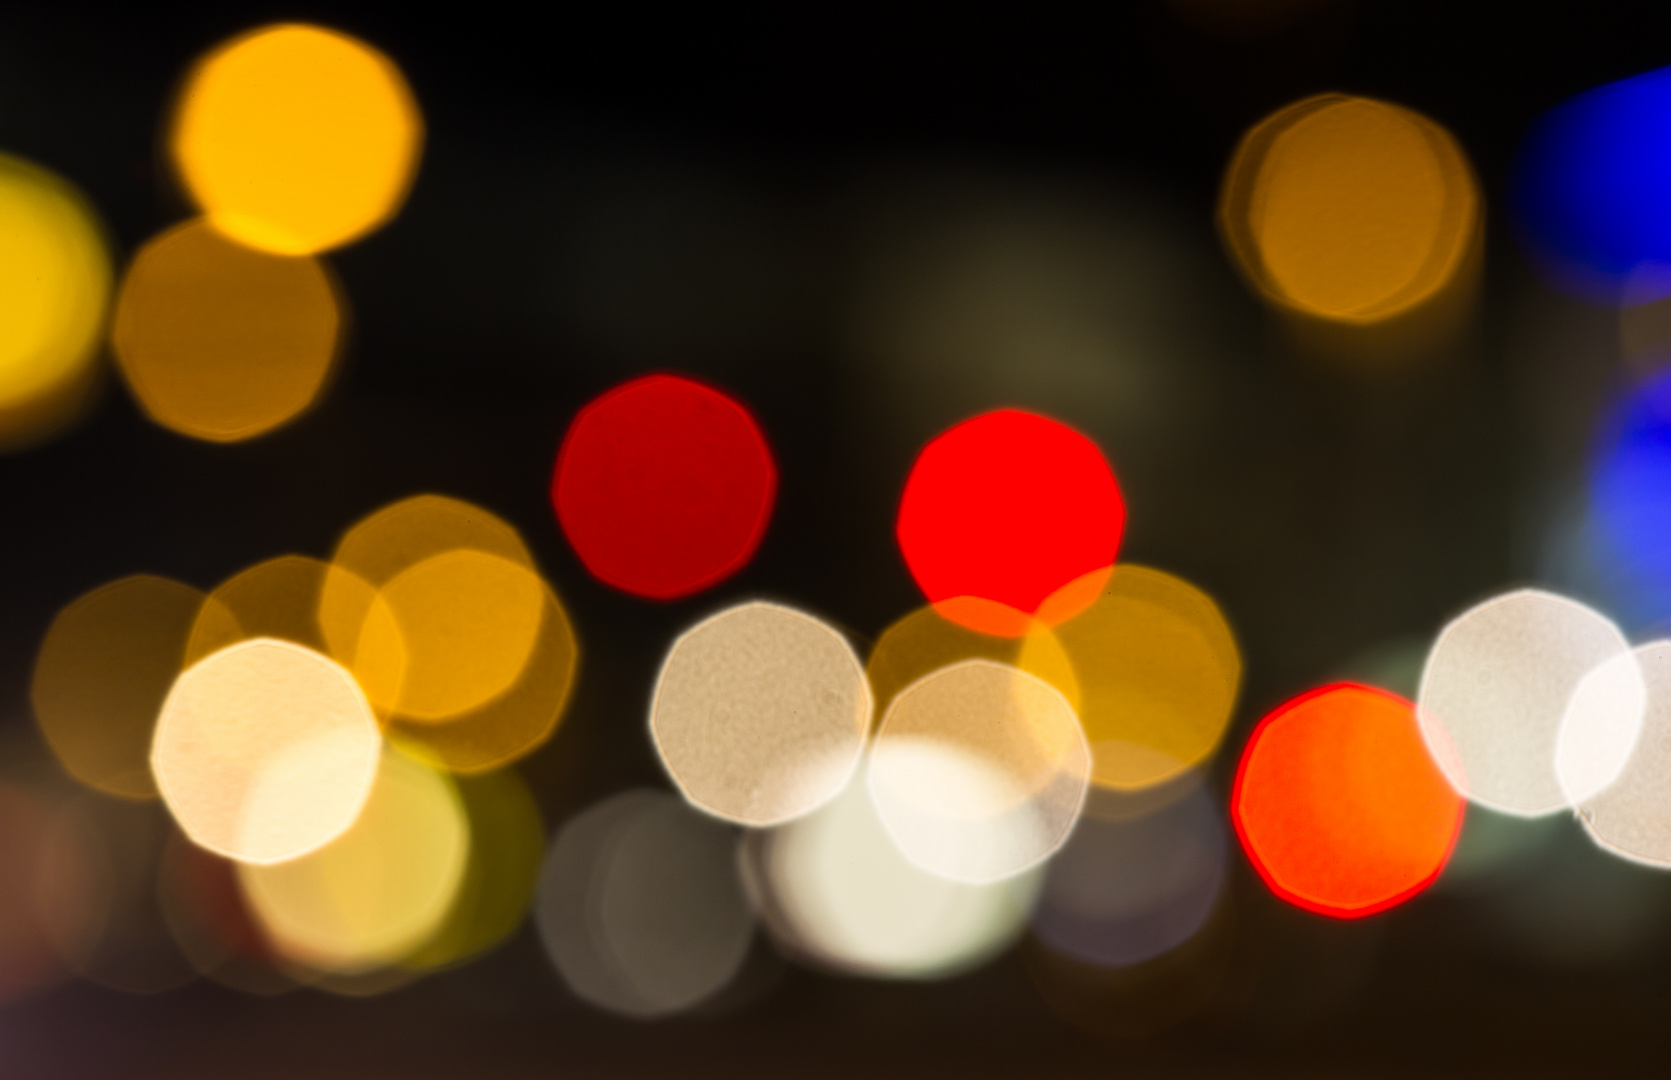

In [21]:
# Auswahl und Anzeigen des Bilds (Quelle: https://www.fotocommunity.de/photo/lichtpunkte-kmikka/33475018)
beispiel_1 = Image.open('Bilder/Beispiel.jpg')
display(beispiel_1)

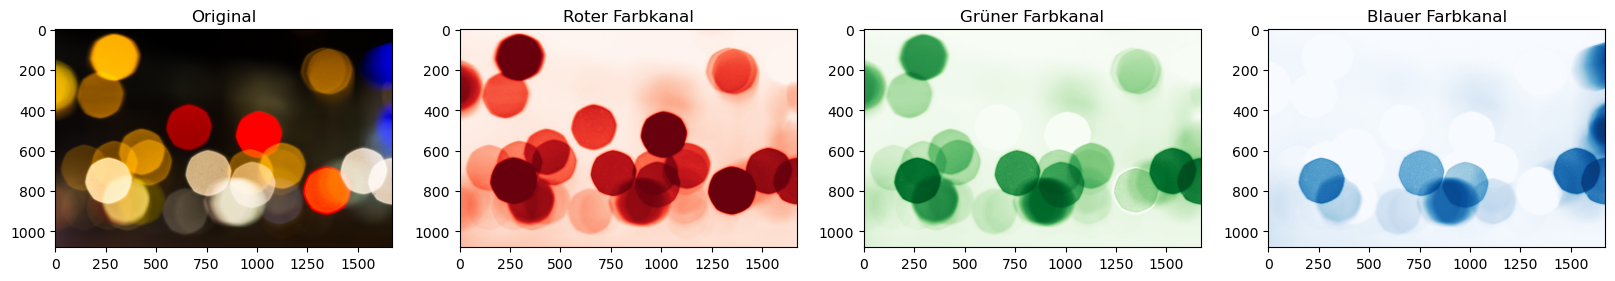

In [22]:
# Aufsplittung des Bildes in die 3 Ebenen
M = np.asarray(beispiel_1)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(M[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(M[:, :, 0], cmap='Reds', vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(M[:, :, 1], cmap='Greens', vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(M[:, :, 2], cmap='Blues', vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

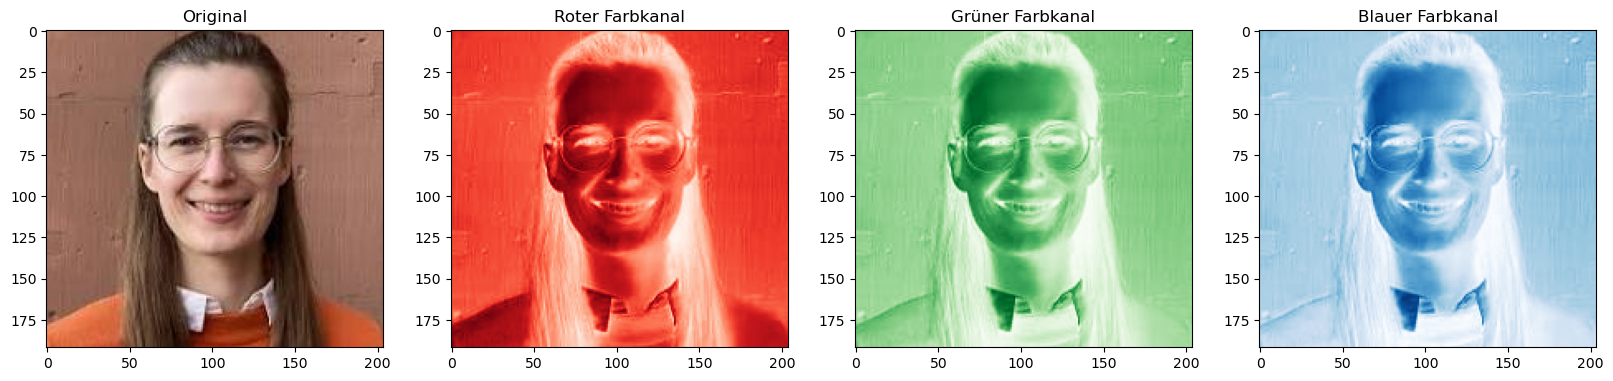

In [42]:
# Bild anzeigen

beispiel_k = Image.open('Bilder/Katharina.jpeg')

original_bild = np.asarray(beispiel_k)

plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(original_bild[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(original_bild[:, :, 1],cmap="Greens", vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(original_bild[:, :, 2],cmap="Blues", vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

[218 105  65]


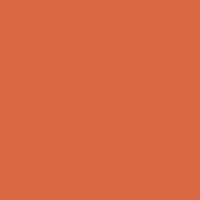

In [44]:
# Man kann auch für einzelne Pixel anschauen, welche Farbe sie haben
pixel_farbe = original_bild[180,40]
print(pixel_farbe)
display(Image.new('RGB',(200,200), tuple(pixel_farbe)))

[218 105  65]


Text(0.5, 1.0, 'Verändertes Bild')

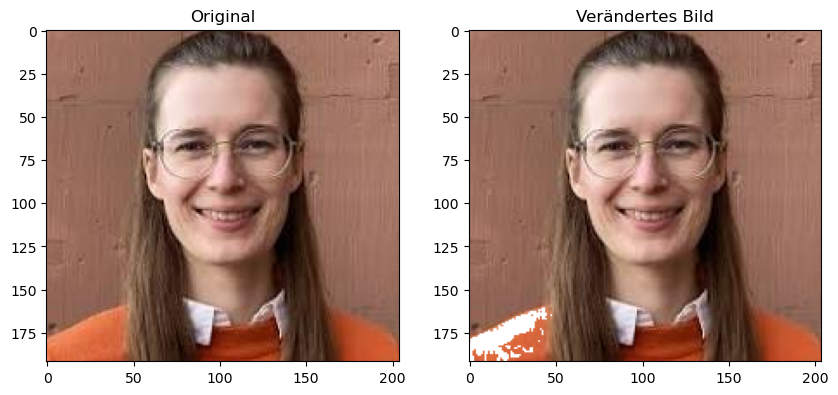

In [52]:
# Man kann Farben durch andere austauschen

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe1 = original_bild[180,40]
print(pixel_farbe)

Reihen, Spalten, Farbkanäle = original_bild.shape
verändertes_bild = original_bild.copy()


for i in range(0,Reihen):
    for j in range(0,Spalten):
        delta1 = np.asarray(original_bild[i,j]) - np.asarray(pixel_farbe1)
        if sum(delta1) < 120:
            verändertes_bild[i,j] = [255,255,255]; # RGB
        else:  verändertes_bild[i,j] = original_bild[i,j]

# Ergebnis anschauen
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(verändertes_bild[:, :, :], vmin=0, vmax=255)
plt.title("Verändertes Bild")

Text(0.5, 1.0, 'Graues Bild')

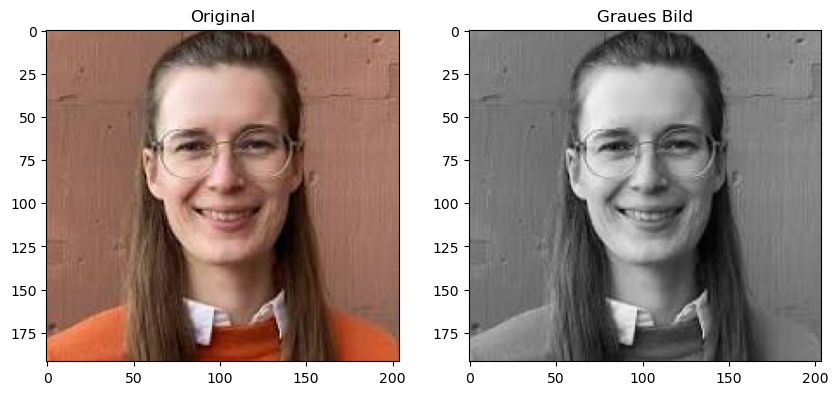

In [53]:
# Man kann farbige Bilder auch in graue Bilder umwandeln (Formal: Graues Bild = 0.299 ∙ Rot + 0.587 ∙ Grün + 0.114 ∙ Blau )

# Wähle aus, welche Farbe du austauschen möchtest anhand eines Pixels
pixel_farbe = original_bild[180,11]

graues_bild = 0.299 * original_bild[:,:,0] + 0.587 * original_bild[:,:,1] + 0.114 * original_bild[:,:,2] 

# Ergebnis anzeigen lassen
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(original_bild, vmin=0, vmax=255)
plt.title("Original")

plt.subplot(122)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Graues Bild")

# Bild Filter

Text(0.5, 1.0, 'Bild mit Box Blur Filter')

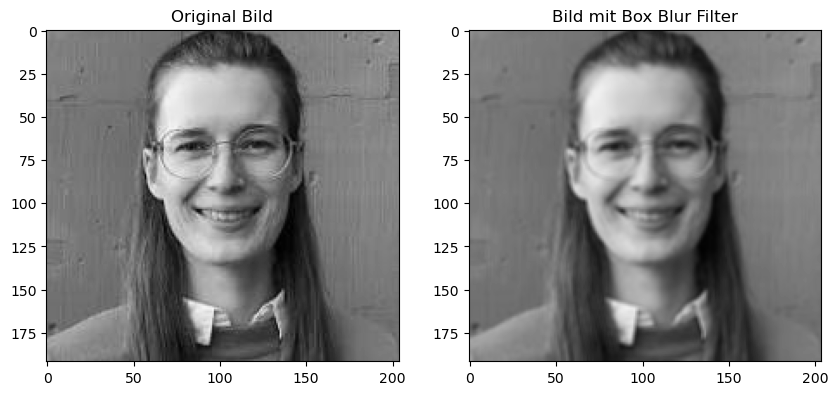

In [54]:
# Definiere den Filter
box_blur = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]]) * 1/9

# Wende den Filter auf das Bild an
ergebnis_box_blur = cv2.filter2D(graues_bild, -1, box_blur)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_box_blur, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Box Blur Filter")

Text(0.5, 1.0, 'Bild mit Sharpening Filter')

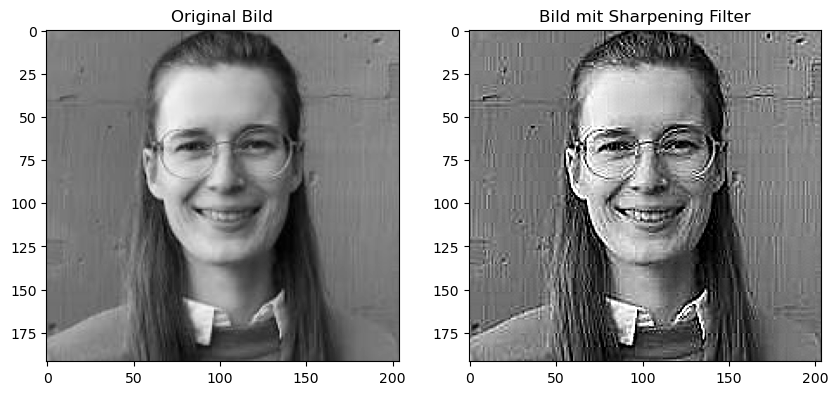

In [55]:
# Definiere den Filter
sharpening = np.array([[0, -1, 0], 
                     [-1, 5, -1], 
                     [0, -1, 0]]) 

# Wende den Filter auf das Bild an
ergebnis_sharpening = cv2.filter2D(graues_bild, -1, sharpening)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_sharpening, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Sharpening Filter")

Text(0.5, 1.0, 'Bild mit Laplacian Filter')

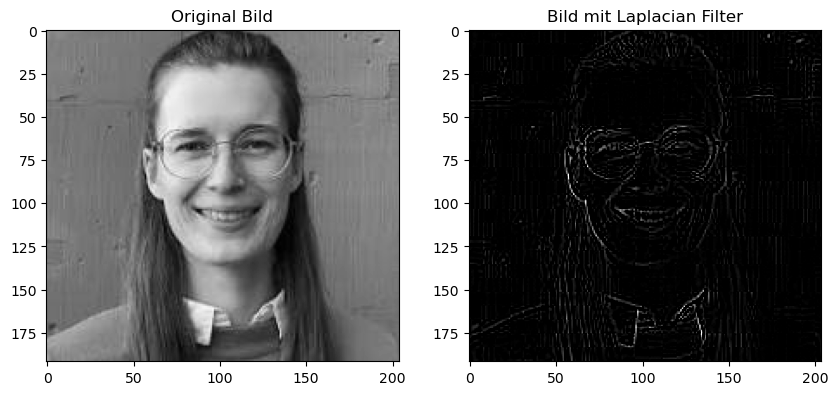

In [80]:
# Definiere den Filter
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

# Wende den Filter auf das Bild an
ergebnis_laplace = cv2.filter2D(graues_bild, -1, laplacian)

# Schaue dir die Ergebnisse an
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(graues_bild, cmap="gray", vmin=0, vmax=255)
plt.title("Original Bild")

plt.subplot(122)
plt.imshow(ergebnis_laplace, cmap="gray", vmin=0, vmax=255)
plt.title("Bild mit Laplacian Filter")

# Bildpyramiden

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255


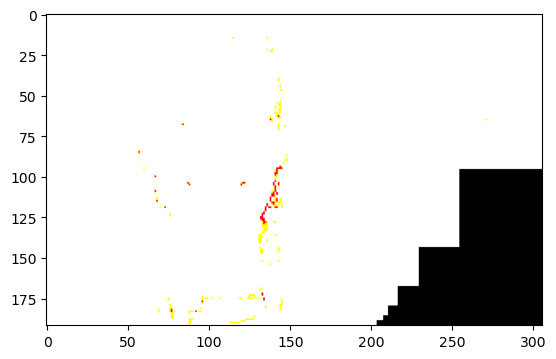

In [98]:
plt.close()

# generate Gaussian pyramid for A
bild1 = original_bild.copy()
Reihen, Spalten, Farbkanäle = original_bild.shape

gaussian_pyramid1 = [bild1]
for i in range(6):
    bild1 = cv2.pyrDown(bild1)
    gaussian_pyramid1.append(bild1)

print(np.max(gaussian_pyramid1[0]))

# Ergebnis anzeigen 
composite_rows = max(Reihen, sum(p.shape[0] for p in gaussian_pyramid1[1:]))
composite_cols = Spalten + gaussian_pyramid1[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols, 3), dtype=np.double)

# store the original to the left
composite_image[:Reihen, :Spalten, :] = gaussian_pyramid1[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in gaussian_pyramid1[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row : i_row + n_rows, Spalten : Spalten + n_cols] = p
    i_row += n_rows
    

fig, ax = plt.subplots()
ax.imshow(composite_image, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.close()

In [72]:
# generate Gaussian pyramid for A
bild1 = original_bild.copy()
bild2 = np.asarray(Image.open('Bilder/Eisvogel.jpeg'))

gaussian_pyramid1 = [bild1]
for i in range(6):
    bild1 = cv2.pyrDown(bild1)
    gaussian_pyramid1.append(bild1)
print(len(gaussian_pyramid1))


gaussian_pyramid2 = [bild2]
for i in range(6):
    bild2 = cv2.pyrDown(bild1)
    gaussian_pyramid2.append(bild1)

# Ergebnis anzeigen (
plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.imshow(original_bild[:, :, :], vmin=0, vmax=255)
plt.title("Original")

plt.subplot(142)
plt.imshow(original_bild[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Roter Farbkanal")

plt.subplot(143)
plt.imshow(original_bild[:, :, 1],cmap="Greens", vmin=0, vmax=255)
plt.title("Grüner Farbkanal")

plt.subplot(144)
plt.imshow(original_bild[:, :, 2],cmap="Blues", vmin=0, vmax=255)
plt.title("Blauer Farbkanal")

plt.show()

7


NameError: name 'rows' is not defined

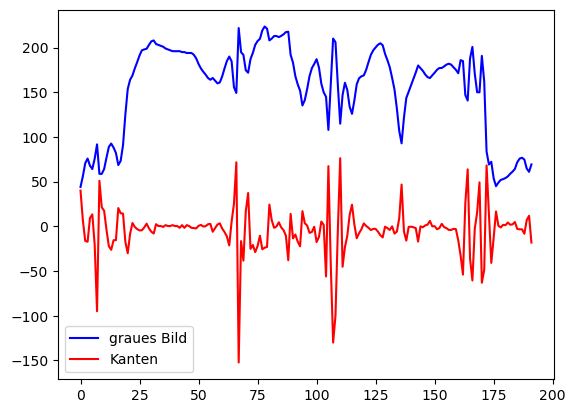

In [65]:
# Die Unterschiede zwischen den 2 Bildern kann man auch graphisch sehen
plt.plot(graues_bild[:,100], color = 'b', label="graues Bild")
plt.plot(ergebnis_kanten[:,100], color = 'r', label="Kanten")
plt.legend()
plt.show()

# Bild Pyramiden

Text(0.5, 1.0, 'Gauß-Pyramide')

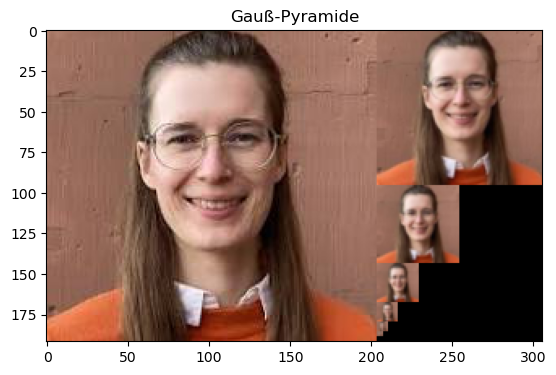

In [147]:
# generate Laplacian Pyramid for A
laplacian_pyramid1 = [gaussian_pyramid1[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gaussian_pyramid1[i])
    L = cv2.subtract(gaussian_pyramid1[i-1],GE)
    laplacian_pyramid1.append(L)
    
# generate Laplacian Pyramid for B
laplacian_pyramid2 = [gaussian_pyramid2[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gaussian_pyramid2[i])
    L = cv2.subtract(gaussian_pyramid2[i-1],GE)
    laplacian_pyramid2.append(L)


# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
 rows,cols,dpt = la.shape
 ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
 LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
 ls_ = cv.pyrUp(ls_)
 ls_ = cv.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
cv.imwrite('Pyramid_blending2.jpg',ls_)
cv.imwrite('Direct_blending.jpg',real)

Text(0.5, 1.0, 'Laplace-Pyramide')

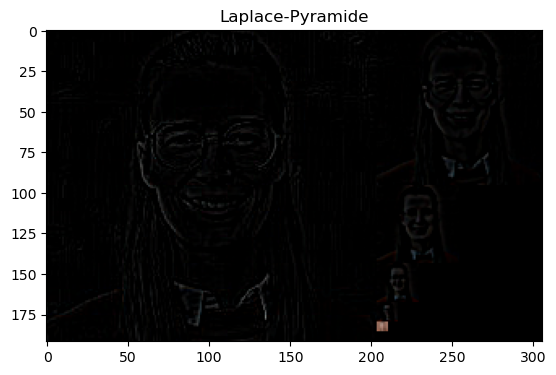

In [152]:
# Laplace-Pyramide erstellen basierend auf den Unterschieden zwischen Gauß-Pyramiden
Reihen, Spalten, Farbkanäle = original_bild.shape
laplace_pyr = [gaussian_pyr[5]]
for i in range(5,0,-1):
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
    GE = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    L = cv2.subtract(gaussian_pyr[i-1],GE)
    laplace_pyr.append(L)

laplace_pyr_vis = laplace_pyr.copy()
laplace_pyr_vis.reverse()

# Füge die einzelnen Bilder zu einem Ergebnis zusammen
composite_image = np.zeros((Reihen, int(1.5*Spalten), 3),dtype=int)
composite_image[:Reihen, :Spalten, :] = laplace_pyr_vis[0]
i_row = 0
for p in laplace_pyr_vis[1:]:
   n_rows, n_cols = p.shape[:2]
   composite_image[i_row : i_row + n_rows, Spalten : Spalten + n_cols] = p
   i_row += n_rows

# Zeige das Ergebnis an
plt.plot()
plt.imshow(composite_image, vmin=0, vmax=255)
plt.title("Laplace-Pyramide")

(192, 204, 3) (192, 204, 3)


Text(0.5, 1.0, 'Wolfsbild')

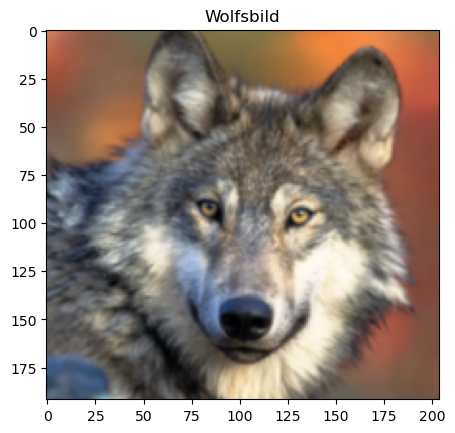

In [153]:
wolf = Image.open('Bilder/wolf.png')
Reihen, Spalten, Farbkanäle = original_bild.shape
wolf = wolf.crop((180,140,1000, 1100))
wolf = cv2.pyrDown(np.asarray(wolf))
wolf = cv2.pyrDown(np.asarray(wolf))
#wolf = cv2.pyrDown(lower, dstsize=(Spalten,Reihen))
wolf = wolf[15:-33,1:]
print(original_bild.shape,wolf.shape)

# Zeige das Ergebnis an
plt.plot()
plt.imshow(wolf, vmin=0, vmax=255)
plt.title("Wolfsbild")

Text(0.5, 1.0, 'Wolfsbild')

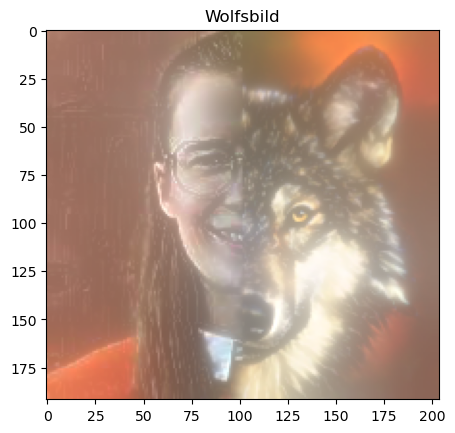

In [163]:
# Gauß-Pyramiden erstellen
lower2 = wolf.copy()
gaussian_pyr2 = [lower2]
for i in range(6):
   lower2 = cv2.pyrDown(lower2)
   gaussian_pyr2.append(lower2)

# Laplace-Pyramide
laplace_pyr2 = [gaussian_pyr2[5]]
for i in range(5,0,-1):
    size = (gaussian_pyr2[i - 1].shape[1], gaussian_pyr2[i - 1].shape[0])
    GE = cv2.pyrUp(gaussian_pyr2[i], dstsize=size)
    L = cv2.subtract(gaussian_pyr2[i-1],GE)
    laplace_pyr2.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(laplace_pyr,laplace_pyr2):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    size = (LS[i].shape[1], LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_,dstsize=size)
    ls_ = cv2.add(ls_, LS[i])

# Zeige das Ergebnis an
plt.plot()
plt.imshow(ls_, vmin=0, vmax=255)
plt.title("Wolfsbild")


Text(0.5, 1.0, 'Faultierbild')

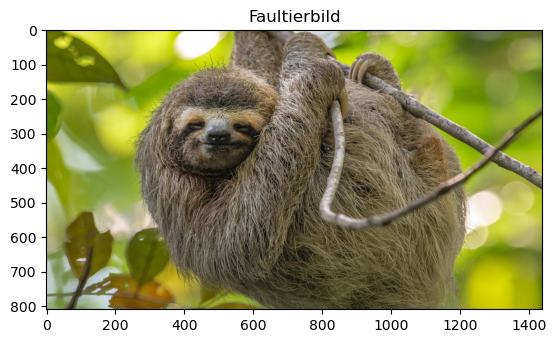

In [69]:
faultier = Image.open('Bilder/faultier.jpg')
# Zeige das Ergebnis an
plt.plot()
plt.imshow(faultier, vmin=0, vmax=255)
plt.title("Faultierbild")